In [83]:
#Import librairies
import numpy as np
import matplotlib.pyplot as plt

#Import the module and make it reload each time there is a change 
import importlib
import double_exo
importlib.reload(double_exo)

<module 'double_exo' from '/run/netsop/u/home-sam/home/aloyens/Internship_CACOLAC/sim_models/First_sim_CACOLAC/double_exo.py'>

In [69]:
#Fixed parameters
r = 0.5
K = 10 
a = 0.1
m = 0.1
gamma = 0.8
T = 5

t_0 = 0
t_n = 1000

tt = 1 #just to not have a missing argument t when we solve models


## 1. Find the periodic solution for one value of $E$

### 1.1 Initial value $(x_{p,0},y_{p,0})$

Plot to have an approximation of the initial value $(x_{p,0},y_{p,0})$

In [70]:
#Initial values
x_0 = 5
y_0 = 5
I_0 = 0
xyI_0 = [x_0, y_0, I_0]

#Bound: the maximum value of E to search the third periodic solution.
E_bound = r * ( 1 - m/(K*gamma*a) )

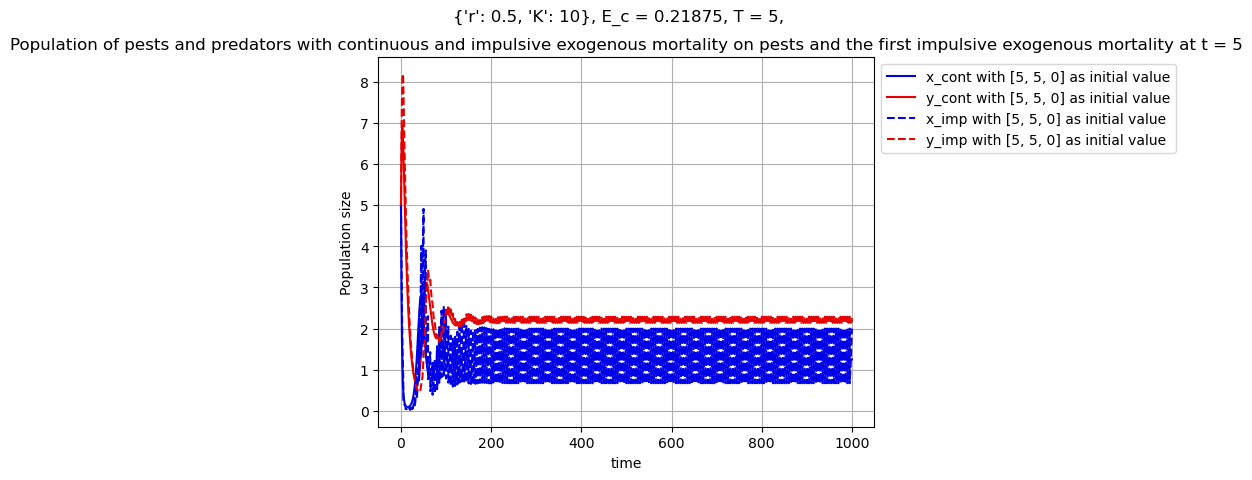

{'T': 5,
 'I_cont_final': 1239.6665143139064,
 'I_imp_final': 1240.2235216450022,
 'eps': 0.01,
 't_pulse': 5,
 't_eta_cont': None,
 't_eta_imp': None}

In [71]:
E_test = 0.5*E_bound #The value of E to try
double_exo.compare_cont_imp_proportional_mortality_on_x(
    xyI0_imp= xyI_0,
    xyI0_cont= xyI_0,
    t=tt,
    gamma=gamma,
    E_c=E_test,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    t_pulse=T,
    eps=0.01,
    plot_population=True
)

Get $(x_{p,0},y_{p,0})$

In [72]:
#New initial value
xyI_0 = [0.8, 2.2, 0]

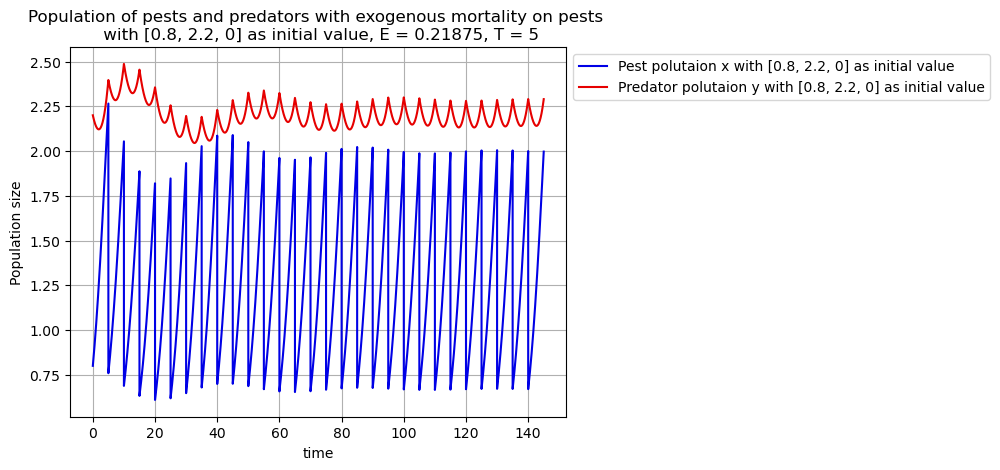

(0.6689124092453851, 2.290145074982682)

In [73]:
double_exo.find_x_y_p_0_with_error_prop_mortality_on_x(
    xyI= xyI_0,
    t=tt,
    gamma=gamma,
    E_c=E_test,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    error=1e-3,
    plot_population=True
)

### 1.2 Value after a period $(x_{p}(T),y_{p}(T))$

We keep the same initial value ```xyI0``` to test the function.

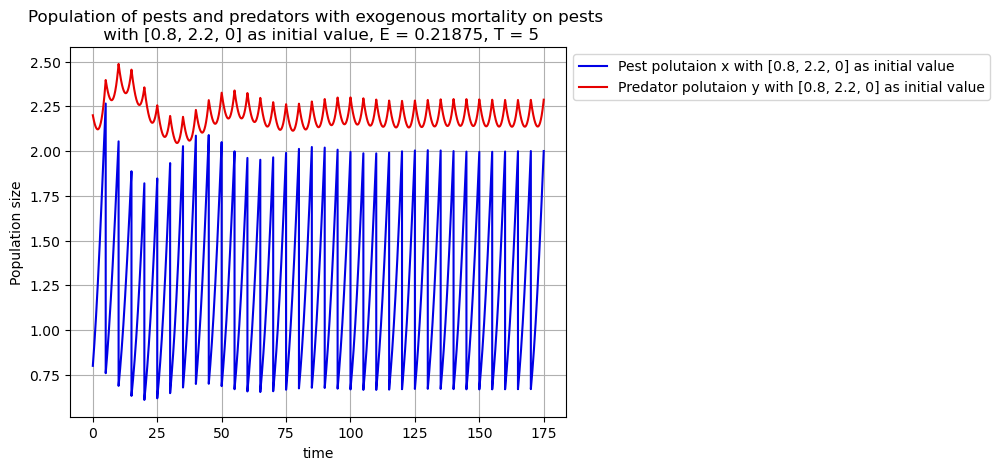

(2.0002539508064023, 2.2870933764078134)

In [85]:
double_exo.find_x_y_p_T_with_error_prop_mortality_on_x(
    xyI= xyI_0,
    t=tt,
    gamma=gamma,
    E_c=E_test,
    T=T,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    error=1e-3,
    plot_population=True
)

The two graphs don't go to the same period because at the period from $140$ to $150$, the condition is satisfied for the initial values but not yet for $(x(T), y(T))$. A mixed function that gives all of the four terms could be written.

## 2. Storage of $(x_{p,0},y_{p,0})$

### 2.1 Initial value $(x_{p,0},y_{p,0})$

We start at $E = 0$ which means no effort. It is similar to the continuous model with $E=0$:   
$(x_{p,0},y_{p,0}) = \left( \frac{m}{\gamma a},\frac{r}{a}\left( 1-\frac{m}{K \gamma a}\right)\right)$

We store the initial value of the periodic solutions for two different values of $T$: $5$ and $10$

In [74]:
#Initial value for E = 0
x_0 = m/(gamma*a)
y_0 = r/a * ( 1 - m/(K*gamma*a))

Meanings of some notations:  
```first```, ```second```, ```third```: correspond respectively to the first, second and thirs periodic solution.  
```low```, ```mid```, ```high```: respectively when $E<r\left(1-\frac{m}{K \gamma a}\right)$, when $r\left(1-\frac{m}{K \gamma a}\right)<E<r$ and when $E>r$.   
```_5```, ```_10```: to precise the value of $T$ used.

In [77]:
#T=5
low_E_5, x_p_0_third_low_5, y_p_0_third_low_5 = double_exo.store_x_p_0_prop_mortality_on_x_with_error(
    xyI=[x_0,y_0,0],
    t=tt,
    gamma=gamma,
    T=5,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    E_c_start=0,
    E_c_stop=E_bound,
    E_c_num= 100,
    error= 1e-3
)

In [78]:
#T=10
low_E_10, x_p_0_third_low_10, y_p_0_third_low_10 = double_exo.store_x_p_0_prop_mortality_on_x_with_error(
    xyI=[x_0,y_0,0],
    t=tt,
    gamma=gamma,
    T=10,
    func_g=double_exo.logistic_model_x,
    kwargs_g={'r':r, 'K':K},
    func_f=double_exo.multiply_x,
    kwargs_f={'z': a}, 
    func_m=double_exo.identity,
    kwargs_m={'z': m},
    t_0=t_0,
    t_n=t_n,
    E_c_start=0,
    E_c_stop=E_bound,
    E_c_num= 100,
    error= 1e-3
)

### 1.2 Value after a period $(x_{p}(T),y_{p}(T))$

## 3. Bifurcation diagram

### 3.1 When $E<r\left(1-\frac{m}{K \gamma a}\right)$

#### 3.1.1 Equilibria

#### 3.1.2 $(x_{p,0},y_{p,0})$

#### 3.1.3 $(x_{p}(T),y_{p}(T))$

### 3.2 When $r\left(1-\frac{m}{K \gamma a}\right)<E<r$

#### 3.2.1 Equilibria

#### 3.2.2 $(x_{p,0},y_{p,0})$

#### 3.2.3 $(x_{p}(T),y_{p}(T))$

### 3.3 When $E>r$